## Q2. Utilize linear regression to forecast stock prices using the AAPL.csv file, which encompasses a range of stock-related attributes spanning from October 17, 2005, to August 13, 2020.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

df_Stock = pd.read_csv('AAPL.csv',  index_col=0)
print(df_Stock.columns)
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'}) #rename the old name of the column 'clost(t)' to newname 'close'

print(df_Stock.shape)

Index(['Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')
(3732, 63)


In [ ]:
df_Stock.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


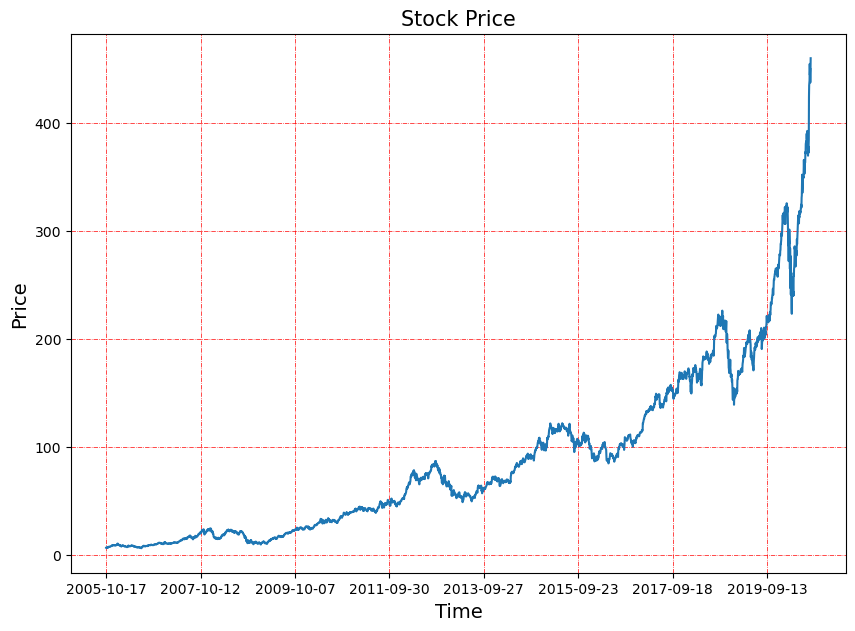

In [ ]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=15)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='r', linestyle='-.', linewidth=0.5)
plt.show()

df_Stock = df_Stock.drop(columns='Date_col') # this column cannot be used to fit

In [ ]:
def create_train_test_set(df_Stock):
    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']
    no_samples = df_Stock.shape[0]
    print('Data size is ', str(no_samples))

    train_split = int(no_samples  * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(no_samples  * 0.1)
    print('Validation Set length - ', str(int(no_samples  * 0.1)))

    print('Test Set length - ', str(int(no_samples  * 0.02)))

    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Data size is  3732
Training Set length -  3284
Validation Set length -  373
Test Set length -  74
(3284, 62) (373, 62) (75, 62)
(3284,) (373,) (75,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)
print("Performance (R^2): ", lr.score(X_train, Y_train))

def get_mape(y_true, y_pred):
    #    Compute mean absolute percentage error (MAPE)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

print("Training R-squaMAPE:", round(get_mape(Y_train,Y_train_pred), 2))
print("Training Mean Sred: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print('Training quared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

LR Coefficients: 
 [ 8.63708500e-03  1.86052011e-01  1.55487191e-01  1.12263740e+00
  1.27287332e-10  6.75249560e-03  1.40229199e-01  1.13219434e-01
  4.25628031e-02  8.96348540e-02  1.01914945e-01  5.94183571e-02
  7.95194219e-02  7.10399857e-02  2.71424979e-01  1.26724139e-01
  8.79333205e-02 -5.87980362e-03 -3.31643378e-01 -3.31643378e-01
 -3.31643378e-01 -3.31643378e-01 -3.31643378e-01  1.88649997e+00
 -1.27270711e+00 -1.65042220e-01 -4.36658266e-04  6.88367679e-13
 -5.07434028e-03  9.02936623e-03  5.78316876e-04  5.78316876e-04
 -5.57918239e-01 -2.02304395e-10  4.18932805e-11  1.69322436e-02
  1.61636707e-02 -1.75659579e-02  6.12165524e-03  2.15420352e-01
  1.13979656e-01 -2.41954675e-01  7.63050278e-02  3.73276599e-01
 -2.22044605e-16 -5.60843994e-02  4.08788808e-02  5.13473859e-01
 -2.94431540e-02 -8.41335087e-02  5.10939133e-02 -8.14435734e-03
 -1.95035195e-02  5.67587242e-02  4.39707791e-02  1.29311736e-02
 -9.99967525e-03 -3.89778329e-03 -1.62174823e-03  1.44436906e-03
  2.83